# Guía

El directorio #include contiene todos los archivos de encabezado. Es especialmente importante porque los archivos de encabezado contienen las definiciones de clase.

La pizarra básica en la que se dibuja un objeto en ROOT se denomina lienzo (definido por la clase TCanvas). Cada objeto en el lienzo es un objeto gráfico en el sentido de que puede agarrarlo, cambiar su tamaño y cambiar algunas características con el mouse. El área del lienzo se puede dividir en varias subáreas, denominadas almohadillas (la clase TPad). Un pad es un área secundaria de lienzo que puede contener otros pads u objetos gráficos

######  La siguiente línea crea un objeto llamado f1 de la clase TF1 que es una función unidimensional. Vamos a graficar la función (func1) sin(x)/x

In [1]:
TF1 f1("func1","sin(x)/x"); //esto tambien se puede escribir como: TF1 f1("func1","sin(x)/x",-10,10); donde se incluye el rango
f1.SetRange(-10,10);

In [2]:
TCanvas c2("c1","c1");

La sintaxis para llamar al método de un objeto, o si se prefiere, para hacer que un objeto haga algo es:
object.method_name(parameters) como se muestra a continuación. El Draw pinta la función 

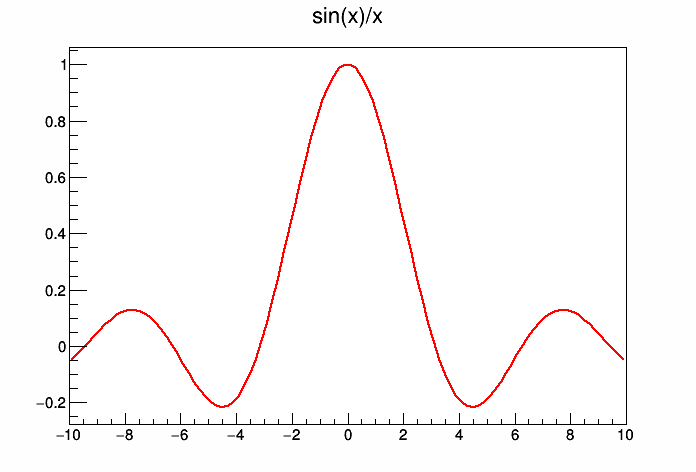

In [3]:
f1.Draw();
c2.Draw();
gPad->SetFillColor(101) //tenemos gPad que siempre apunta al pad activo. Por ejemplo, si desea cambiar el color de 
//relleno de la almohadilla activa, pero no sabe su nombre, puede usarlo gPad. Hasta 100 combinaciones.

###### Las clases comienzan con T: TLine,TTree

El TROOT objeto tiene varias listas que apuntan a los principales objetos ROOT.

Los tipos que no son de clase terminan con _t:Int_t

Las constantes comienzan con k: kInitialSize

Las variables globales comienzan con g:gEnv

###### Tipos: 

Long64_t : Entero largo firmado portátil de 8 bytes

Int_t Entero :firmado 4 bytes

Float_t :Flotador 4 bytes

Bool_t :Booleano (0 = falso, 1 = verdadero)

ROOT tiene una utilidad llamada h2root que puede usar para convertir sus histogramas HBOOK / PAW o archivos ntuple en archivos ROOT. Para usar este programa, escriba el comando de script de shell: h2root  <hbookfile>  <rootfile>

ROOT incluye una función para generar automáticamente el código para una función de análisis de esqueleto. Ver "Análisis de ejemplo".TTree::MakeClass

## HISTOGRAMAS

Los histogramas de perfil, por otro lado, se utilizan para mostrar el valor medio de Y y su RMS para cada bin en X.

TProfile : perfiles unidimensionales;
TProfile2D : perfiles bidimensionales
###### Todas las clases de histograma ROOT se derivan de la clase base TH1

In [4]:
// using various constructors
TF1 f2("exponencial","(rand()%101)*exp(-x)",0.,5.);
TH1* h1 = new TH1I("h1", "Primer Histograma", 100, 0.0, 4.0);// ..(...,100,0.0,4.0) el 100 es la cantidad de puntos en el eje X
TH2* h2 = new TH2F("h2", "Segundo Histograma", 40, 0.0, 2.0, 30, -1.5, 3.5); // TH2* h = new TH2D(/* name */ "h2",/* title */ "Hist with constant bin width", /* X-dimension */ 100, 0.0, 4.0,/* Y-dimension */ 200, -3.0, 1.5);
TH3* h3 = new TH3D("h3", "Tercer Histograma", 80, 0.0, 1.0, 100, -2.0, 2.0,50, 0.0, 3.0);

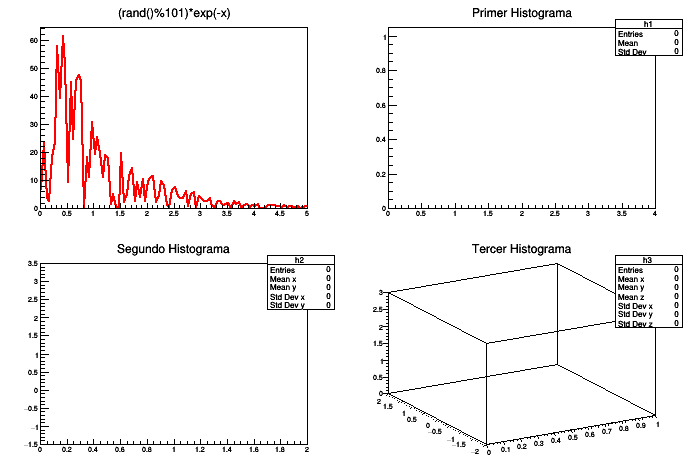

In [5]:
TCanvas c3("c","c");
c->Divide(2,2);//esto divide los espacios de mi Canvas, los pads. 2 pads en la primera linea y los otros 2 en la segunda linea
//el primer 2 es cuantas imagenes voy a colocar en la linea 1 y el otro 2 son las imagenes que voy a colocar en la segunda linea
c->cd(1);f2.Draw();//Es usado el "." porque f2 no es un puntero
c->cd(2);h1->Draw();//cd() es para asignar las posiciones en las que se van a mostrar los histogramas
c->cd(3);h2->Draw();
c->cd(4);h3->Draw();
c3.Draw();//pinta mis histogramas en el lienzo

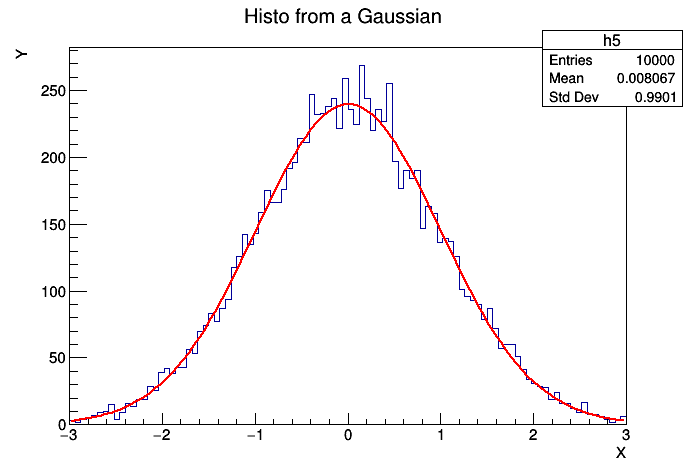

 FCN=78.849 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=2.87322e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.39420e+02   2.98901e+00   1.04878e-02   3.07903e-04
   2  Mean         9.56366e-03   1.01191e-02   4.41268e-05  -1.04706e-02
   3  Sigma        9.94429e-01   7.57122e-03   8.92460e-06   2.65667e-01


In [6]:
TH1F h5("h5","Histo from a Gaussian;X;Y",100,-3,3);//note que se puede colocar el nombre de los ejes seguido del nombre del histograma, los subindices y superindices tienen la misma anotación que en LaTeX
//FillRandom se puede usar para llenar aleatoriamente un histograma usando el contenido de una función TF1 existente u otro histograma TH1
TCanvas c5("c5","c5");
h5.FillRandom("gaus",10000);//crean y llenan un histograma con una distribución gaussiana
h5.Fit("gaus");//Para ajustar un histograma con una función predefinida, en este caso una distribucion guasiana. Ojo es importante colocar el nombre del histograma, en este caso es h5
h5.Draw();
c5.Draw();

## Gráficos

Los gráficos se crean con el TGraph constructor.

In [7]:
Int_t n=20;
Double_t z[1000], y[1000];

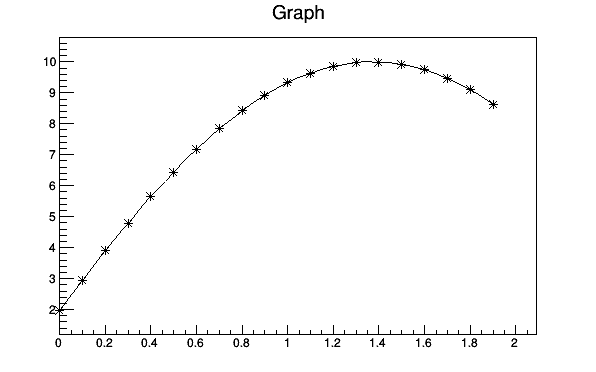

In [8]:
for (Int_t i=0;i<n;i++) {
      z[i] = i*0.1;
      y[i] = 10*sin(z[i]+0.2);
   }

   // create graph
   TGraph *gr  = new TGraph(n,z,y);
   TCanvas *c6 = new TCanvas("c6","Graph Draw Options",200,10,600,400);

   // draw the graph with axis, continuous line, and put
   // a * at each point
   gr->Draw("AC*");
   c6->Draw();

## Gráfico Polar

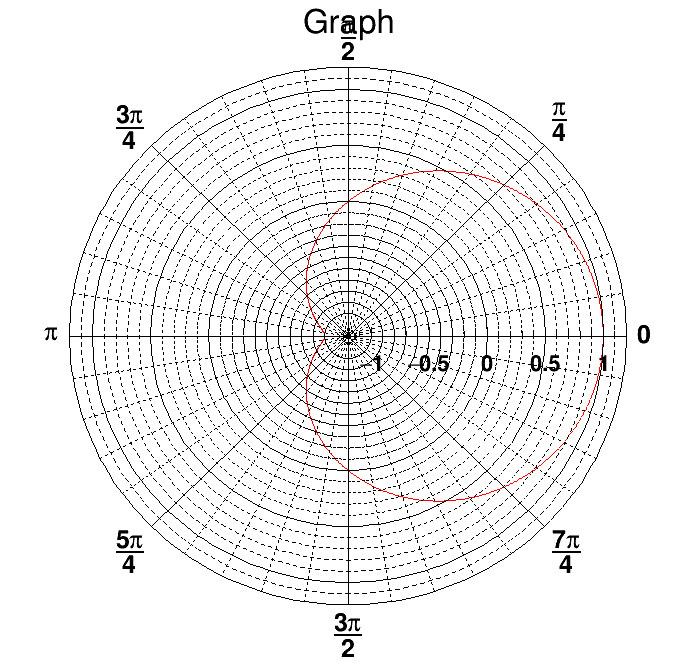

In [9]:
TCanvas *CPol = new TCanvas("CPol","TGraphPolar Examples",700,700);
Double_t rmin=0;
Double_t rmax=TMath::Pi()*2;
Double_t r[1000];
Double_t theta[1000];
TF1 * fp1 = new TF1("fplot","cos(x)",rmin,rmax);
for (Int_t ipt = 0; ipt < 1000; ipt++) {
   r[ipt] = ipt*(rmax-rmin)/1000+rmin;
   theta[ipt] = fp1->Eval(r[ipt]);
 }
TGraphPolar * grP1 = new TGraphPolar(1000,r,theta);
grP1->SetLineColor(2);
grP1->Draw("AOL");
CPol->Draw();